In [97]:
# Por si alguien corre en python2
from __future__ import division

# Preparamos todo para correr
import numpy as np
from math import *
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.stats import norm, binom, gamma, poisson, multivariate_normal
from sklearn import linear_model


## Ejercicio 1: Fitteando una recta ruidosa de manera Bayesiana.

Como primer ejemplo de regresión lineal, tratemos de fittear los parametros $a_{0}$, $a_{1}$ de una recta $f(x,\vec{a}) = a_0 + a_{1}x$ donde $x$ está en el intervalo $[-1,1)$.

* **A)** Genere un set artificial de datos usando, usando como valores $a_{1} = 0.5$, $a_{0}= -0.3$. Añada a las mediciones ruido gaussiano  $\epsilon \sim \mathcal{N}(\mu=0, \sigma = 0.2)$. 
Al terminar debería tener un conjunto de $N= 100$  pares $(x_n,t_n)$, con 
$t_n = f(x_n,\vec{a}) + \epsilon$.

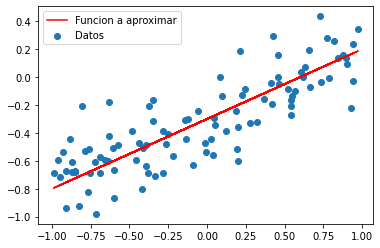

In [98]:
np.random.seed(42)
N = 100
a1 = 0.5
a0 = -0.3
x =np.random.uniform(low=-1.0, high=1.0, size=(100,))
var = 0.2
f = a0 + a1 * x
t = a0+a1*x+var*np.random.randn(N)
plt.scatter(x,t,label='Datos')
plt.plot(x,f,color='red',label='Funcion a aproximar')
plt.legend(loc='upper left')

* **B)** Como modelo usaremos una regresión lineal de la forma $y(x) = \omega_0 + \omega_1 x$. ¿Cuál base de funciones $\phi_j$ estamos usando? (recuerde que por convención $\phi_0(x)=1$). 
Escriba para estos la matriz de diseño.
$$\Phi = \begin{pmatrix}
\phi_0(x_1) & \phi_1(x_1)\\
\phi_0(x_2) & \phi_1(x_2)\\
\vdots & \vdots)\\
\phi_0(x_N) & \phi_1(x_N)\\
\end{pmatrix}$$

In [99]:
x

array([-0.25091976,  0.90142861,  0.46398788,  0.19731697, -0.68796272,
       -0.68801096, -0.88383278,  0.73235229,  0.20223002,  0.41614516,
       -0.95883101,  0.9398197 ,  0.66488528, -0.57532178, -0.63635007,
       -0.63319098, -0.39151551,  0.04951286, -0.13610996, -0.41754172,
        0.22370579, -0.72101228, -0.4157107 , -0.26727631, -0.08786003,
        0.57035192, -0.60065244,  0.02846888,  0.18482914, -0.90709917,
        0.2150897 , -0.65895175, -0.86989681,  0.89777107,  0.93126407,
        0.6167947 , -0.39077246, -0.80465577,  0.36846605, -0.11969501,
       -0.75592353, -0.00964618, -0.93122296,  0.8186408 , -0.48244004,
        0.32504457, -0.37657785,  0.04013604,  0.09342056, -0.63029109,
        0.93916926,  0.55026565,  0.87899788,  0.7896547 ,  0.19579996,
        0.84374847, -0.823015  , -0.60803428, -0.90954542, -0.34933934,
       -0.22264542, -0.45730194,  0.65747502, -0.28649335, -0.43813098,
        0.08539217, -0.71815155,  0.60439396, -0.85089871,  0.97

In [100]:
#Matriz de disenio es una columna de unos y los valores de la variable. En este caso sólo tengo un x.
phi = np.vstack([x**0, x]).T
phi

array([[ 1.        , -0.25091976],
       [ 1.        ,  0.90142861],
       [ 1.        ,  0.46398788],
       [ 1.        ,  0.19731697],
       [ 1.        , -0.68796272],
       [ 1.        , -0.68801096],
       [ 1.        , -0.88383278],
       [ 1.        ,  0.73235229],
       [ 1.        ,  0.20223002],
       [ 1.        ,  0.41614516],
       [ 1.        , -0.95883101],
       [ 1.        ,  0.9398197 ],
       [ 1.        ,  0.66488528],
       [ 1.        , -0.57532178],
       [ 1.        , -0.63635007],
       [ 1.        , -0.63319098],
       [ 1.        , -0.39151551],
       [ 1.        ,  0.04951286],
       [ 1.        , -0.13610996],
       [ 1.        , -0.41754172],
       [ 1.        ,  0.22370579],
       [ 1.        , -0.72101228],
       [ 1.        , -0.4157107 ],
       [ 1.        , -0.26727631],
       [ 1.        , -0.08786003],
       [ 1.        ,  0.57035192],
       [ 1.        , -0.60065244],
       [ 1.        ,  0.02846888],
       [ 1.        ,

* **C)** Estamos interesados en encontrar los valores de $\omega_0$ y $\omega_1$ de nuestro modelo más probables, dado los datos que tenemos. Estos están dados por el máximo de nuestra distribución posterior. Si usamos priors uniformes en $\omega_0$ y $\omega_1$ para caracterizar nuestro desconocimiento, el máximo del posterior coincide con el de la verosimilitud y es lo que llamamos el *estimador de máxima verosimilitud*. De acuerdo a lo visto en la teórica, dicho valor esta dado por 
$$\begin{pmatrix}
\omega_0^\text{ML}\\
\omega_1^\text{ML}\\
\end{pmatrix} 
= \left(\Phi^T \Phi\right)^{-1}\Phi^T \,\vec{t}
$$
donde recordemos que $\vec{t} = \begin{pmatrix}t_1\\ \vdots \\ t_N\end{pmatrix}$ es el vector de los valores *target* medidos.

Nota: Para un modelo lineal con error gaussiano, este estimador de maxima verosimilitud coincide con lo que se conoce como la solución de *cuadrados mínimos*.

In [101]:
res = np.dot(phi.T,phi)
res1 = np.dot(phi.T,t)
res2 = np.linalg.solve(res, res1)
print(res2)

[-0.30295809  0.45402268]


* **D)** Si en vez de utilizar un prior uniforme, utilizamos un prior gaussiano de la forma $p(\vec{\omega}) = \mathcal{N} (\vec{0},\alpha^{-1}{\bf 1})$ (es decir que $p(\vec{\omega}) = p(\omega_0) \times p(\omega_1)$ con cada $p(\omega_i) = \mathcal{N} (\mu=0,\sigma = \alpha)$ ). Calcule la verosimilitud y el posterior (prior*posterior normalizado) al usar solo 1 punto, 2 puntos, 3 puntos y todo el conjunto de 100 puntos.


Si se le complica hacerlo en forma numerica, puede utilizar la formula analitica dle posterior: Como este es un prior conjugado a la gaussiana en la teórica (o en su defecto, en el Bishop ecuacion 3.53), vimos que nuestro posterior es una gaussiana con valor medio
$$
\vec{m}_N = \beta {\bf S}_N \Phi^T \vec{t}\\
{\bf S}_N^{-1} = \alpha {\bf 1} + \beta \Phi^T \Phi
$$
donde $\beta$ es el parámetro de precisión del ruido gaussiano, que se supone conocido. En nuestro caso sería $\beta = (1/\sigma)^2 = (1/0.2)^2 = 25$. Para seleccionar la cantidad de puntos a considerar, puede usar slicing en $\vec{t}$ ( ``t[:N_puntos]``) y en $\Phi$ (``Phi[:N_puntos,:]``).

# Ejercicio 1 bis: Scikit-learn

Scikit-learn es una librería de machine learning con gran soporte para una multitud de algoritmos de análisis de datos, que nos permite acceder a ellos de una forma muy similar, obviando las diferencias técnicas entre sus implementaciones. En la práctica, nadie escribe sus propias funciones para algoritmos (a menos que sea un algoritmo novedoso que estás diseñando), sino que utilizamos las implementaciones provistas por este u otro paquete.

* **A)** Scikit-learn provee una clase LinearRegressor la cual permite obtener las soluciones de cuadrados mínimos en problemas lineales. Importe el paquete, y examine las distintas funciones leyendo la documentación provista en el paquete. Si no es suficiente, [visite la documentación on-line](https://scikit-learn.org/), para familiarizarse con como se utiliza.

In [102]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept = False)
#descomente cada linea para ver la documentación.
#LinearRegression?
#reg.fit?
#reg.predict?
#reg.score?

* **B)** Utilizando los datos del ejercicio anterior, repita el inciso **C)** utilizando scikit-learn.

In [103]:
reg.fit(phi,t)
print(reg.coef_)

[-0.30295809  0.45402268]


# Ejercicio 2: Algoritmo de Cuadrados Mínimos con Polinomios

El algoritmo de cuadrados mínimos consiste en hallar los parámetros que minimicen la distancia cuadrática entre los datos y mi ajuste $$ E_{D}(\vec{w})=\frac{1}{2}\left(t-\vec{w}^{T}\vec{\phi}(\vec{x})\right)^{2}.$$ Este puede verse como el estimador de máxima verosimilitud cuando modelamos los errores como gaussianos en un problema lineal.

 Considere el siguiente set de datos ``X``y ``T`` como dado:

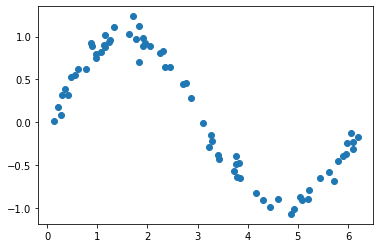

In [104]:
np.random.seed(42)
X=2*np.pi*np.random.rand(70)
T=np.asarray(list(map(lambda x: 1.0*np.sin(x)+norm.rvs(loc=0.0,scale=0.1),X)))
T.shape
plt.scatter(X,T)

* **A)** Considere la base de funciones los polinomios $\phi_j(x) = x^j$, con $j=1,\dots,M$. Calcule la matriz de diseño.

Matriz de disenio : $\{1, x_1, x_2, x_3,....., x_1 x_2, x_1 x_3, x_2 x_3,....., x_1^2, x_2^2,x_3^2,......., x_1^j, x_2^j, x_3^j\}$



* **B)** Calcule la solución de cuadrados mínimos, utilizando la expresión dada en el inciso **C)** del **Ejercicio 1**, (la ecuación 3.15 del Bishop; ecuaciones normales). Grafíquela encima de los datos. Estudie como cambia para distintos tamaños de la base, i.e. distintos valores de $M$.

In [105]:
X

array([2.35330497, 5.97351416, 4.59925358, 3.76148219, 0.98029403,
       0.98014248, 0.3649501 , 5.44234523, 3.77691701, 4.44895122,
       0.12933619, 6.09412333, 5.23039137, 1.33416598, 1.14243996,
       1.15236452, 1.91161039, 3.2971419 , 2.71399059, 1.82984665,
       3.84438512, 0.87646578, 1.83559896, 2.30191935, 2.86557222,
       4.93340606, 1.25458737, 3.23103027, 3.72225051, 0.29185655,
       3.81731689, 1.07143467, 0.40873121, 5.96202367, 6.067245  ,
       5.07931034, 1.91394476, 0.61369199, 4.2991629 , 2.76555968,
       0.76678884, 3.11128829, 0.21606945, 5.71342859, 1.62596258,
       4.16275028, 1.95853845, 3.26768375, 3.43508199, 1.1614748 ,
       6.09207989, 4.87030317, 5.90304595, 5.62236606, 3.75671636,
       5.79230665, 0.55601479, 1.23139664, 0.28417144, 2.04411075,
       2.44213144, 1.70493625, 5.20711134, 2.24154726, 1.76516358,
       3.40986006, 0.88545302, 5.04035228, 0.46841551, 6.2007935 ])

In [106]:
phi4 = np.vstack([X**0, X, X**2, X**3]).T
phi4.shape

(70, 4)

In [107]:
T = T.reshape(-1, 1)

In [108]:
res = np.dot(phi4.T,phi4)
res1 = np.dot(phi4.T,T)
res2 = np.linalg.solve(res, res1)
res2

array([[-0.26943441],
       [ 1.9830687 ],
       [-0.90062846],
       [ 0.09496393]])

In [109]:
#Predict
resultado_poli2 = np.dot(phi4, res2)

In [110]:
T.shape

(70, 1)

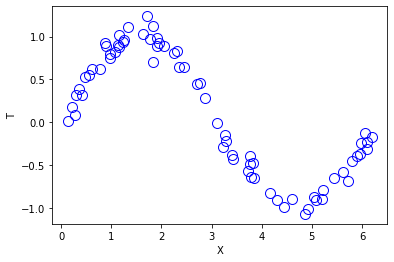

In [111]:
xx = np.linspace(0, 1, 70).reshape([-7, 7])

def plot_data_sine(x, t, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.plot(x, t, 'ob', mfc='None', ms=10)
    ax.set_xlabel('X')
    ax.set_ylabel('T')
    return

plot_data_sine(X, T)

Text(0.5, 1.0, 'Grado 1')

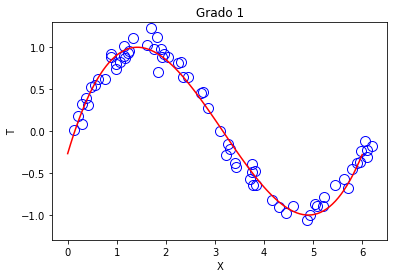

In [112]:
xx = np.linspace(0, 6, 100).reshape([-1, 1])
Phi_preds=np.hstack((xx*0.0+1.0,xx, xx**2, xx**3))
preds_manual=np.dot(Phi_preds,res2)

plot_data_sine(X, T)
plt.plot(xx, preds_manual, 'r-', label='Prediction')
plt.ylim(-1.3, 1.3)
plt.title('Grado {}'.format(1))

* **C)** Separe el set de datos en training y validation en una proporción de 0.8/0.2. En base a lo visto en la teoría, ¿observa overfitting? ¿a que se debe? ¿cómo lo reduciría? 

In [113]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(X, test_size = 0.2, random_state=42)
t_train_set, t_test_set = train_test_split(T, test_size = 0.2, random_state=42)


In [114]:
phi_train = np.vstack([train_set**0, train_set, train_set**2, train_set**3]).T
phi_train.shape

(56, 4)

In [115]:
t_train_set = t_train_set.reshape(-1, 1)

In [116]:
res = np.dot(phi_train.T,phi_train)
res1 = np.dot(phi_train.T,t_train_set)
rees2 = np.linalg.solve(res, res1)
rees2

array([[-0.28791209],
       [ 2.06183421],
       [-0.93518682],
       [ 0.09862675]])

Text(0.5, 1.0, 'Grado 1')

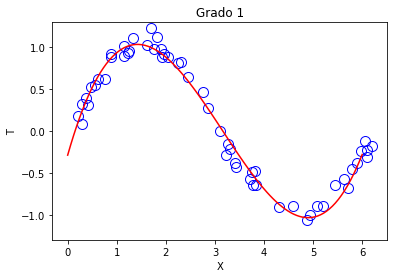

In [117]:
xx = np.linspace(0, 6, 100).reshape([-1, 1])
Phi_preeds=np.hstack((xx*0.0+1.0,xx, xx**2, xx**3))
preeds_manual=np.dot(Phi_preeds,rees2)

plot_data_sine(train_set, t_train_set)
plt.plot(xx, preeds_manual, 'r-', label='Prediction')
plt.ylim(-1.3, 1.3)
plt.title('Grado {}'.format(1))

In [118]:
#Predict
phi_test = np.vstack([test_set**0, test_set, test_set**2, test_set**3]).T
phi_test.shape


(14, 4)

In [119]:
resultado_poli_test = np.dot(phi_test, rees2)
resultado_poli_test 

array([[ 0.95574576],
       [ 0.67048012],
       [ 0.99980121],
       [ 0.92750951],
       [-0.51138492],
       [ 0.39114317],
       [-0.03667259],
       [-0.33568176],
       [-0.79602722],
       [-0.97532931],
       [ 0.96894871],
       [-0.94026457],
       [-1.0248587 ],
       [ 0.92743181]])

In [120]:
t_test_set

array([[ 0.70316966],
       [ 0.64145482],
       [ 0.87532652],
       [ 0.74673936],
       [-0.38844097],
       [ 0.45082952],
       [ 0.01834241],
       [-0.36584472],
       [-0.82660779],
       [-0.78755744],
       [ 0.8260614 ],
       [-0.98406638],
       [-0.87150706],
       [ 0.79965549]])

In [121]:
 # Calculo el RMSE    
from sklearn.metrics import mean_squared_error as mse

rmse = (np.sqrt(mse(t_test_set, resultado_poli_test))) 
rmse

0.1292272139764165

Text(0.5, 1.0, 'Grado 1')

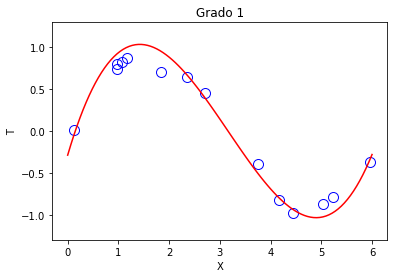

In [122]:
xx = np.linspace(0, 6, 100).reshape([-1, 1])
Phi_preeds=np.hstack((xx*0.0+1.0,xx, xx**2, xx**3))
preeds_manual=np.dot(Phi_preeds,rees2)

plot_data_sine(test_set, t_test_set)
plt.plot(xx, preeds_manual, 'r-', label='Prediction')
plt.ylim(-1.3, 1.3)
plt.title('Grado {}'.format(1))

Al parecer nuestro polinomio se ajusta muy bien a los datos de testeo. Esto se debe a que los datos en sí parecen tener una distribución muy parecida a la de las funciones con grado del polinomio igual a 3.

# Ejercicio 2 bis: Scikit-learn

Utilizar una base de funciones $\phi_j(x)$ es lo que en la jerga de data science se conoce como *feature extraction*. Transformamos nuestros datos $x$ en features $\tilde x = \phi_j(x)$, los cuales usamos para alimentar nuestros modelos (por ejemplo, el Regresor Lineal de los ejercicios anteriores. Este tipo de transformaciones es parte de lo que se conoce como *pre-procesado* de los datos.

* **A)** Importe de ``sklearn.preprocessing`` la clase ``PolynomialFeatures``. Examine su documentación para ver que es lo que hace.

In [123]:
from sklearn.preprocessing import PolynomialFeatures
PolynomialFeatures?


* **B)** Utilizando ``PolynomialFeatures`` y ``LinearRegressor`` repita el inciso **B** del ejercicio anterior. 

Si le interesa aprender una forma mas elegante de tratar con preprocesado (que podría ser util si se realizan mas transformaciones previas), examine el importe la clase ``Pipeline`` de ``sklearn.pipeline``, e intente usarla con ayuda de [los ejemplos de la documentación](https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions).

In [124]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


pp = Pipeline([('poly', PolynomialFeatures(degree = 3)),
               ('lr', LinearRegression(fit_intercept = False))
              ])

train_set = train_set.reshape(-1,1)
pp.fit(train_set, t_train_set )

coef = pp.named_steps['lr'].coef_

In [125]:
coef

array([[-0.28791209,  2.06183421, -0.93518682,  0.09862675]])

Text(0.5, 1.0, 'Grado 1')

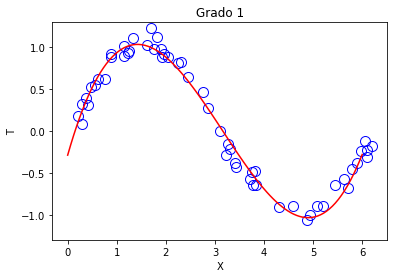

In [126]:
xx = np.linspace(0, 6, 100).reshape([-1, 1])
Phi_preeds=np.hstack((xx*0.0+1.0,xx, xx**2, xx**3))
preeds_manual=np.dot(Phi_preeds,coef.T)

plot_data_sine(train_set, t_train_set)
plt.plot(xx, preeds_manual, 'r-', label='Prediction')
plt.ylim(-1.3, 1.3)
plt.title('Grado {}'.format(1))

In [127]:
#RMSE Manual
test_set = test_set.reshape(-1,1)
c = t_test_set - pp.predict(test_set)

residuos = np.sqrt(np.sum(c**2) / len(c))
residuos


0.1292272139764071

In [128]:
#RMSE 
rmse = (np.sqrt(mse(t_test_set,  pp.predict(test_set)))) 
rmse

0.1292272139764071

# Ejercicio 3: SGD

Considere el siguiente dataset:

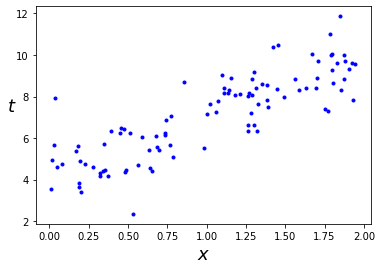

In [129]:
X = 2 * np.random.rand(100, 1)
t = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, t, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$t$", rotation=0, fontsize=18)
plt.show()

Queremos aproximar estos datos por un modelo lineal simple,

$y_{i} = w_{0} + w_{1}x_{i}$

**A)** Encuentre los valores de $w_{0}$ y $w_{1}$ que minimizan el error en cuadrados minimos

$E_{D}(\vec{w})=\sum_{n=1}^{N}E_{n}(\vec{w})=\frac{1}{2}\sum_{n=1}^{N}(t_{n}-y_{n}(\vec{w}))^{2}$

**B)** Una forma de aproximar la solución cerrada de forma iterativa consiste en aplicar el algoritmo de Descenso por Gradiente para minimizar la función $E_D(\vec{\omega})$:
$$
\vec{w}^{\tau+1}=\vec{w}^{\tau}-\eta\nabla E_{n}(\vec{w}^{\tau})\\
=\vec{w}^{\tau}+\eta(t_{n}-\vec{w}^{\tau T}\vec{\phi}(\vec{x}_n))\vec{\phi}(\vec{x}_{n}).
$$

Donde partimos de un valor $\vec{\omega}^0$ aleatorio que nos permite calcular de forma iterativa los $\vec{\omega}^\tau$ subsiguientes en función del parametro $\eta$ (también llamado *learning rate*).  Este algoritmo es muy util cuando los datos no entran en memoria o cuando la evaluacion es muy pesada, por lo que es mejor evaluar dato por dato. Este no es el caso pero podemos aprovechar para implementarlo y comparar con la solucion exacta.

Se recorre muchas veces el dataset y cada recorrida se denomina _epoca_ (epoch en ingles). En general, se recomienda elegir los datos al azar (pudiendo repetirse datos) en cada epoca. El algoritmo funciona de la siguiente manera:

* Inicializo $w_{0}$
* Epoca $j = 1,..,E$
 * Dato $i = 1,...,N$, elegido al azar de todo el dataset. Setteo $\eta_{i,j}$
  * Actualizo $w$ utilizando la Ecuacion con el dato $\vec{x}_{i}$ de la epoca $j$.

Inicialice $w_{0}$ al azar. Examine la evolucion del algoritmo en funcion de las epocas primero para un valor fijo de $\eta=0.2$ y luego siguiendo un _learning schedule_ en el que el valor de $\eta$ se actualiza de esta manera:

$\eta = \frac{t_{0}}{t+t_{1}}$ con $t = j\cdot N + i$ y $t_{0}, t_{1}$ hiperparametros. En principio tome $t_{0} = 10$ y $t_{1} = 50$. 

Compare con la solucion exacta. Que ventaja tiene la actualizacion del $\eta$?


 **C)** Se puede ver que incluir un prior normal centrado en cero para los parámetros, equivale a agregar a la función de cuadrados mínimos un término regularizador
$$E_{D}(\vec{w})=\frac{1}{2}\sum_{i=1}^{N}(t_{i}-\vec{w}^{T}\vec{\phi}(\vec{x_{i}}))^{2}+\frac{\kappa}{2}\vec{w}^{T}\vec{w}.$$
Esto se traduce, en el algoritmo recursivo, en la siguiente expresión
$$
\vec{w}^{\tau+1}=\vec{w}^{\tau}-\eta\left[(t_{n}-\vec{w}^{\tau T}\vec{\phi}(\vec{x}_n))\vec{\phi}(\vec{x}_{n}) + \kappa \vec{\omega}^{\tau}\right].
$$
Modifique el código del inciso anterior, y para un valor de $\kappa$ de su elección, estudie que sucede (puede comparar con el caso $\kappa=0$ que coincide con el inciso anterior).

# Ejercicio 3 bis: Scikit-Learn

* **A)** Examine la instancia de ``SGDRegressor``, y usando el argumento ``loss="squared_loss"`` utilicelo para resolver el inciso **B** anterior de forma iterativa (será util el argumento ``learning_rate=constant`` y ``eta0=`` para comparar con la realizada en el ejercicio anterior).

In [130]:
from sklearn.linear_model import SGDRegressor
SGDRegressor?

# Ejercicio 4: Cross-validation para comparación de modelos

En este ejercicio utilizaremos el set de datos de precios inmobiliarios en el estado de Boston, que viene con scikit-learn.

In [131]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

import pandas as pd  

En la siguiente celda cargamos el dataset, y con el creamos un DataFrame de Pandas. Scikit-learn nos entrega un diccionario con los datos, el nombre de cada feature, el target, y una descripción general del dataset.

In [132]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
#añadimos el target como una columna llamada 'MEDV'
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Puede leer la descripción de cada feature ejecutando la siguiente celda

In [133]:
print(boston_dataset.DESCR[296:1226])


        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's


El objetivo de este ejercicio es predecir el viviendas de Boston ("MEDV") a partir del resto de los features.

Para simplificar la tarea, solo consedere los dos features mas correlacionados con el target "MEDV". La siguiente lista, y los gráficos de correlación (ploteados por el muy util paquete ``seaborn``), pueden ayudarlo a elegir.

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

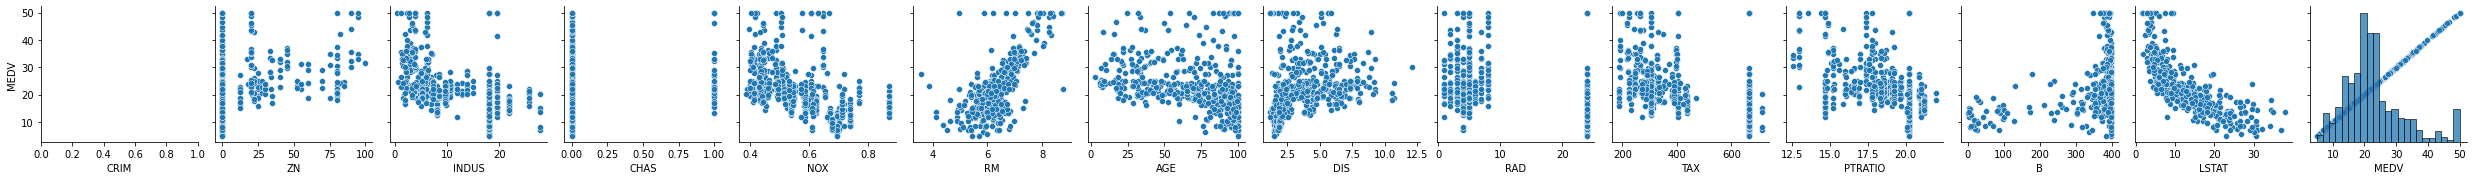

In [134]:
from seaborn import pairplot
pairplot(boston, x_vars=boston.columns,y_vars='MEDV')
abs(boston.corr()['MEDV']).sort_values(ascending=False)

**A)**
Divida sus datos en Training /Test, usando en una proporcion de 0.8/0.2. 

In [135]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(boston, test_size = 0.2, random_state = 0)


boston_train = train [['LSTAT', 'RM' ]]
boston_train_labels = train [['MEDV']]

boston_test = test [['LSTAT', 'RM' ]]
boston_test_labels = test [['MEDV']]



**B)** Utilice validación cruzada y K-folding para comparar el desempeño de diferentes modelos lineales utilizando solamente los datos de Training. Utilice la métrica de desempeño ``scoring='neg_root_mean_squared_error'``. Los modelos a comparar son:
* Regresión lineal unidimensional utilizando cada uno de los features escogidos.
* Regresión lineal bidimensional utilizando ambos features.
* Regresión polinomial cuadrática unidimensional utilizando cada uno de los features escogidos.
* Regresión polinomial cuadrática  bidimensional utilizando ambos features.
En base a estos resultados, elija un modelo. 

In [136]:
import sklearn.preprocessing as pp
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [137]:
#Regresión lineal unidimensional para LSTAT
modelo1 = Pipeline([('scarler', StandardScaler()), ('features',  pp.PolynomialFeatures(degree=1)), ('regresion', LinearRegression(fit_intercept = False)) ])
cros1_neg = cross_val_score(modelo1, boston_train[['LSTAT']], boston_train_labels, cv = 10, scoring='neg_root_mean_squared_error')
cros1 = -cros1_neg
print(cros1.mean(), cros1.std())

6.0183055190689565 0.9295666042371824


In [138]:
#Regresión lineal unidimensional para RM
modelo2 = Pipeline([('scarler', StandardScaler()), ('features',  pp.PolynomialFeatures(degree=1)), ('regresion', LinearRegression(fit_intercept = False)) ])
cros2_neg = cross_val_score(modelo2, boston_train[['RM']], boston_train_labels, cv = 10, scoring='neg_root_mean_squared_error')
cros2 = -cros2_neg
print(cros2.mean(), cros2.std())

6.5056619364967405 1.128342507315503


In [139]:
#Regresión lineal bidimensional con ambos Features

modelo3 = Pipeline([('scarler', StandardScaler()), ('features',  pp.PolynomialFeatures(degree=1)), ('regresion', LinearRegression(fit_intercept = False)) ])
cros3_neg = cross_val_score(modelo3, boston_train[['LSTAT','RM']], boston_train_labels, cv = 10, scoring='neg_root_mean_squared_error')
cros3 = -cros3_neg
print(cros3.mean(), cros3.std())




5.386672866110675 0.8773073969374584


In [140]:
#Regresión polinomial cuadrática unidimensional utilizando LSTAT

modelo4 = Pipeline([('scarler', StandardScaler()), ('features',  pp.PolynomialFeatures(degree=2)), ('regresion', LinearRegression(fit_intercept = False)) ])
cros4_neg = cross_val_score(modelo4, boston_train[['LSTAT']], boston_train_labels, cv = 10, scoring='neg_root_mean_squared_error')
cros4 = -cros4_neg
print(cros4.mean(), cros4.std())


5.32742801144321 0.6779018343456013


In [141]:
#Regresión polinomial cuadrática unidimensional utilizando RM

modelo5 = Pipeline([('scarler', StandardScaler()), ('features',  pp.PolynomialFeatures(degree=2)), ('regresion', LinearRegression(fit_intercept = False)) ])
cros5_neg = cross_val_score(modelo5, boston_train[['RM']], boston_train_labels, cv = 10, scoring='neg_root_mean_squared_error')
cros5 = -cros5_neg
print(cros5.mean(), cros5.std())


6.169293194092781 1.3272733916460848


In [142]:
#Regresión polinomial cuadrática  utilizando ambos Features

modelo6 = Pipeline([('scarler', StandardScaler()), ('features',  pp.PolynomialFeatures(degree=2)), ('regresion', LinearRegression(fit_intercept = False)) ])
cros6_neg = cross_val_score(modelo6, boston_train[['LSTAT','RM']], boston_train_labels, cv = 10, scoring='neg_root_mean_squared_error')
cros6 = -cros6_neg
print(cros6.mean(), cros6.std())


4.431498932556886 1.0902017989305495


**C)** Considere la regresión polinomial  cuadrática de los ultimos dos casos. Añada un término de regularización LASSO y RIDGE. Utilice validación cruzada para medir su desempeño, ¿cómo se compara a los casos anteriores? ¿Puede elegir los valores óptimos para la regularización?

In [143]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV


In [183]:
alphas = np.logspace(-20, -5, 25, base=np.e)
ridgeregressor = Ridge(alpha=alphas, fit_intercept=False)



In [204]:
modelo_rid = Pipeline([('scarler', StandardScaler()), ('features',  pp.PolynomialFeatures(degree=2)), ('regresion',ridgeregressor) ])
parameters={'regresion__alpha':alphas}

gg = GridSearchCV(modelo_rid, parameters, 
                  cv=10,
                  scoring='neg_root_mean_squared_error', refit=True)

gg.fit( boston_train[['LSTAT','RM']], boston_train_labels)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scarler', StandardScaler()),
                                       ('features', PolynomialFeatures()),
                                       ('regresion',
                                        Ridge(alpha=array([2.06115362e-09, 3.85074192e-09, 7.19413303e-09, 1.34404100e-08,
       2.51099916e-08, 4.69116402e-08, 8.76424822e-08, 1.63737713e-07,
       3.05902321e-07, 5.71500774e-07, 1.06770401e-06, 1.99473370e-06,
       3.72665317e-06, 6.96230472e-06,...
       2.51099916e-08, 4.69116402e-08, 8.76424822e-08, 1.63737713e-07,
       3.05902321e-07, 5.71500774e-07, 1.06770401e-06, 1.99473370e-06,
       3.72665317e-06, 6.96230472e-06, 1.30072977e-05, 2.43008313e-05,
       4.53999298e-05, 8.48182352e-05, 1.58461325e-04, 2.96044730e-04,
       5.53084370e-04, 1.03329764e-03, 1.93045414e-03, 3.60656314e-03,
       6.73794700e-03])},
             scoring='neg_root_mean_squared_error')

In [201]:
#print(gg.best_estimator_)
#print(gg.best_params_)
print(-gg.best_score_)


4.431492189783605


In [146]:
#Término de regulación Lasso 

In [203]:
alphas = np.logspace(-20, -5, 25, base=np.e)
lassoregressor = Lasso(alpha=alphas, fit_intercept=False)

modelo_las = Pipeline([('scarler', StandardScaler()), ('features',  pp.PolynomialFeatures(degree=2)), ('regresion',lassoregressor) ])
parameters={'regresion__alpha':alphas}

gg_1 = GridSearchCV(modelo_las, parameters, 
                  cv=10,
                  scoring='neg_root_mean_squared_error', refit=True)

gg_1.fit( boston_train[['LSTAT','RM']], boston_train_labels)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scarler', StandardScaler()),
                                       ('features', PolynomialFeatures()),
                                       ('regresion',
                                        Lasso(alpha=array([2.06115362e-09, 3.85074192e-09, 7.19413303e-09, 1.34404100e-08,
       2.51099916e-08, 4.69116402e-08, 8.76424822e-08, 1.63737713e-07,
       3.05902321e-07, 5.71500774e-07, 1.06770401e-06, 1.99473370e-06,
       3.72665317e-06, 6.96230472e-06,...
       2.51099916e-08, 4.69116402e-08, 8.76424822e-08, 1.63737713e-07,
       3.05902321e-07, 5.71500774e-07, 1.06770401e-06, 1.99473370e-06,
       3.72665317e-06, 6.96230472e-06, 1.30072977e-05, 2.43008313e-05,
       4.53999298e-05, 8.48182352e-05, 1.58461325e-04, 2.96044730e-04,
       5.53084370e-04, 1.03329764e-03, 1.93045414e-03, 3.60656314e-03,
       6.73794700e-03])},
             scoring='neg_root_mean_squared_error')

In [205]:
#print(gg_1.best_estimator_)
print(gg_1.best_params_)
#print(-gg_1.best_score_)


{'regresion__alpha': 0.006737946999085469}


Al ser un polinómio de grado tan bajo, la penalización es casi inexistente.  El valor óptimo está dado por best_params en ambos casos. En el código de arriba se muestran cláramente.

**D)**  (*) Considere una Regresión polinomial de grado ``M`` con regularización (LASSO o RIDGE). Utilice validación cruzada para obtener la mejor combinación de parámetros ``M`` y ``alpha`` (el regulador)

In [217]:
from sklearn.model_selection import GridSearchCV


pp_ridge = Pipeline([('scaler', StandardScaler()),('features',  pp.PolynomialFeatures()), ('rr',Ridge(fit_intercept = False))])

alphas = np.logspace(-20, -5, 25, base=np.e)
grados = [1,2,3,4,5]

parameters = {'features__degree':grados, 'rr__alpha':alphas}

modelo_ridge_variosgrados = GridSearchCV(pp_ridge, parameters, cv= 10,scoring='neg_root_mean_squared_error', refit=True) 

modelo_ridge_variosgrados.fit(boston_train[['LSTAT','RM']], boston_train_labels)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('features', PolynomialFeatures()),
                                       ('rr', Ridge(fit_intercept=False))]),
             param_grid={'features__degree': [1, 2, 3, 4, 5],
                         'rr__alpha': array([2.06115362e-09, 3.85074192e-09, 7.19413303e-09, 1.34404100e-08,
       2.51099916e-08, 4.69116402e-08, 8.76424822e-08, 1.63737713e-07,
       3.05902321e-07, 5.71500774e-07, 1.06770401e-06, 1.99473370e-06,
       3.72665317e-06, 6.96230472e-06, 1.30072977e-05, 2.43008313e-05,
       4.53999298e-05, 8.48182352e-05, 1.58461325e-04, 2.96044730e-04,
       5.53084370e-04, 1.03329764e-03, 1.93045414e-03, 3.60656314e-03,
       6.73794700e-03])},
             scoring='neg_root_mean_squared_error')

In [218]:
print(modelo_ridge_variosgrados.best_params_)

{'features__degree': 2, 'rr__alpha': 0.006737946999085469}


In [231]:

pp_Lasso = Pipeline([('features',  pp.PolynomialFeatures()), ('rr_l',Lasso(fit_intercept = False, tol=1e-3, max_iter=10000))])

alphas=np.logspace(-20, -5, 25, base=np.e)
degree=[1,2,3,4]

parameters_l = {'features__degree':grados, 'rr_l__alpha':alphas}

modelo_lasso_variosgrados = GridSearchCV(pp_Lasso, parameters_l, cv= 10,scoring='neg_root_mean_squared_error', refit=True) 

modelo_lasso_variosgrados.fit(boston_train[['LSTAT','RM']], boston_train_labels)

/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3468.5941323921193, tolerance: 218.54155999999998
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3564.249749506649, tolerance: 220.97496999999998
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3489.2695221255894, tolerance: 214.72880999999998
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increas

/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3564.2497390321228, tolerance: 220.97496999999998
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3489.269503999512, tolerance: 214.72880999999998
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2988.6127492127644, tolerance: 218.91798999999997
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increas

/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3489.2693857665586, tolerance: 214.72880999999998
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2988.6143696553468, tolerance: 218.91798999999997
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3512.5587218441296, tolerance: 216.99694999999997
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increa

/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3512.5480288502317, tolerance: 216.99694999999997
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3371.0181128119166, tolerance: 216.21067
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3109.9375212944497, tolerance: 215.56737
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3371.0352667309244, tolerance: 216.21067
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3109.649644410162, tolerance: 215.56737
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3315.272527271398, tolerance: 211.28087999999997
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of ite

/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3315.170514263536, tolerance: 211.28087999999997
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3486.442334106065, tolerance: 217.22842
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3564.221047693604, tolerance: 218.21146000000002
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3564.1448258879605, tolerance: 218.21146000000002
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3469.3678030861233, tolerance: 218.54155999999998
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3563.487044707723, tolerance: 220.97496999999998
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increas

/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3534.6457308994195, tolerance: 220.97496999999998
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3455.324856169712, tolerance: 214.72880999999998
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3020.3401685305, tolerance: 218.91798999999997
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase t

/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3408.2203066882703, tolerance: 214.72880999999998
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2762.117907304796, tolerance: 218.91798999999997
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3424.7190945253155, tolerance: 216.99694999999997
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increas

/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2762.118145823042, tolerance: 218.91798999999997
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3424.7191889412966, tolerance: 216.99694999999997
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3335.902511951755, tolerance: 216.21067
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the numb

/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3424.7198045975456, tolerance: 216.99694999999997
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3335.9036493469157, tolerance: 216.21067
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3025.8235820640734, tolerance: 215.56737
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3335.911065612144, tolerance: 216.21067
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3025.8245210792215, tolerance: 215.56737
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3246.7756645879167, tolerance: 211.28087999999997
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3025.830629394988, tolerance: 215.56737
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3246.8134993843773, tolerance: 211.28087999999997
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3402.8381916834533, tolerance: 217.22842
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3247.059454061423, tolerance: 211.28087999999997
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3403.122066187172, tolerance: 217.22842
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3473.7083970241524, tolerance: 218.21146000000002
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the numb

/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3404.9415238523857, tolerance: 217.22842
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3475.5480649572446, tolerance: 218.21146000000002
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3407.1970829338266, tolerance: 218.54155999999998
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the nu

/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3485.921129455564, tolerance: 218.21146000000002
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3418.412461031567, tolerance: 218.54155999999998
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3474.9418324405415, tolerance: 220.97496999999998
  positive)
/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase

/home/agustin18/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3783.935055285614, tolerance: 240.96212
  positive)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('features', PolynomialFeatures()),
                                       ('rr_l',
                                        Lasso(fit_intercept=False,
                                              max_iter=10000, tol=0.001))]),
             param_grid={'features__degree': [1, 2, 3],
                         'rr_l__alpha': array([2.06115362e-09, 3.85074192e-09, 7.19413303e-09, 1.34404100e-08,
       2.51099916e-08, 4.69116402e-08, 8.76424822e-08, 1.63737713e-07,
       3.05902321e-07, 5.71500774e-07, 1.06770401e-06, 1.99473370e-06,
       3.72665317e-06, 6.96230472e-06, 1.30072977e-05, 2.43008313e-05,
       4.53999298e-05, 8.48182352e-05, 1.58461325e-04, 2.96044730e-04,
       5.53084370e-04, 1.03329764e-03, 1.93045414e-03, 3.60656314e-03,
       6.73794700e-03])},
             scoring='neg_root_mean_squared_error')

In [232]:
print(modelo_lasso_variosgrados.best_params_)

{'features__degree': 2, 'rr_l__alpha': 2.06115362243856e-09}


In [234]:
print(modelo_lasso_variosgrados.best_estimator_)

Pipeline(steps=[('features', PolynomialFeatures()),
                ('rr_l',
                 Lasso(alpha=2.06115362243856e-09, fit_intercept=False,
                       max_iter=10000, tol=0.001))])


In [237]:
print(-modelo_lasso_variosgrados.best_score_)

4.416938134994249


**E)**  (*) Opcional: Explore el dataset. Pruebe incluír mas features,  y explore las diversas funcionalidades vistas en clase: Estratificación, distintas funciones de base, etc.